In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sortedcontainers import SortedSet

## **Visualize the Data**

Best way to figure out the logic to solve the problem.

To visualize the circle and chords, by caling the `plot_circle_and_chords` function with the list of chords as an argument.

In [78]:
def plot_circle_and_chords(chords):
    fig, ax = plt.subplots()

    circle = plt.Circle((0, 0), radius=1, color='red', fill=False, linewidth=1)
    ax.add_patch(circle)

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    # Draw the chords
    for i, chord in enumerate(chords):

        start_angle = chord[0]
        end_angle = chord[1]

        x1, y1 = np.cos(start_angle), np.sin(start_angle)
        x2, y2 = np.cos(end_angle), np.sin(end_angle)

        chord_line = plt.Line2D([x1, x2], [y1, y2], color='blue', linewidth=1)
        ax.add_line(chord_line)

        ax.annotate(f's{i+1}', (x1, y1), xytext=(5, -5), textcoords='offset points')
        ax.annotate(f'e{i+1}', (x2, y2), xytext=(5, -5), textcoords='offset points')

    ax.set_aspect('equal')

    plt.title("Circle with Chords")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.grid(True)
    plt.show()


**Formatting Data to create input in below order**

The `format_for_brute` function takes a list input_data, where the first element is a list of radian measures, and the second element is a list of identifiers.

It creates a formatted list output for a brute force algorithm, where each chord is represented by a list containing the start and end points.

The function returns the formatted list.

In [79]:
def format_for_brute(input_data):
    output = []
    for i in range(len(input_data[0])):
        angle, name = input_data[0][i], input_data[1][i]

        if name[0] == 's' or name[0]=='S':
            output.append([angle])
        else:
            temp = output[int(name[1]) - 1]
            temp.append(angle)
    return output

Number of intersections: 4


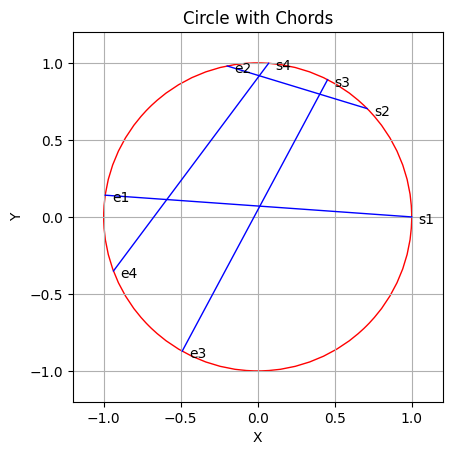

In [80]:
# First Test Case
input_data = [
    [0, 0.78, 1.1, 1.5, 1.77, 3.0, 3.5, 4.2],
    ['S1', 'S2', 'S3', 'S4', 'e2', 'e1', 'e4', 'e3']
]

formatted = format_for_brute(input_data)

print("Number of intersections:", 4)
plot_circle_and_chords(formatted)

Number of intersections: 3


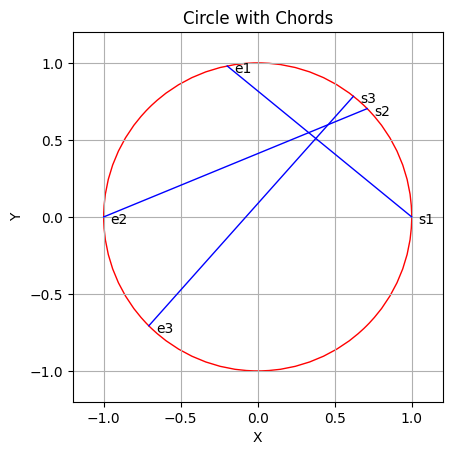

In [81]:
# Second Test Case

input_data =  [
   [0  ,0.78  ,0.90, 1.77, 3.141592653589793,3.9269908169872414],
   ["s1","s2","s3","e1","e2","e3"]
   ]

formatted = format_for_brute(input_data)

print("Number of intersections:", 3)
plot_circle_and_chords(formatted)

Number of intersections: 2


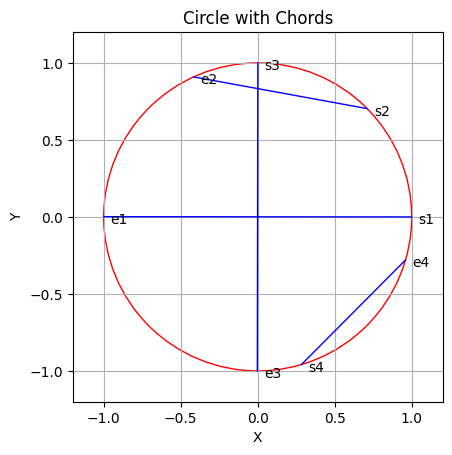

In [82]:
# Third Test Case

input_data =  [
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","s2","s3","e2","e1","e3","s4","e4"]
   ]

formatted = format_for_brute(input_data)

print("Number of intersections:", 2)
plot_circle_and_chords(formatted)

Number of intersections: 0


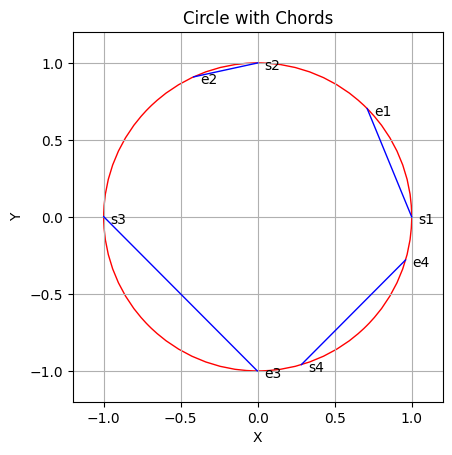

In [83]:
# Fourth Test Case

input_data =  [
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","e1","s2","e2","s3","e3","s4","e4"]
   ]

formatted = format_for_brute(input_data)

print("Number of intersections:", 0)
plot_circle_and_chords(formatted)

## Brute Force Approach

In the brute force approach, we can linearly iterate through the list of chords and check whether they intersect with the remaining chords.

### Intersection Condition:

For two chords, let's denote them as chord_1 and chord_2:

- Let (s1, e1) be the coordinates for chord_1.
- Let (s2, e2) be the coordinates for chord_2.

There will be an intersection if:
- s2 lies within the interval (s1, e1)
- e2 > e1

The brute force algorithm will iteratively check these conditions for each pair of chords to determine the number of intersections.

In [84]:
def format_for_brute(input_data):

    formatted = []

    for i in range(len(input_data[0])):

        angle, name = input_data[0][i], input_data[1][i]

        if name[0] == 's' or name[0]=='S':
            formatted.append([angle])
        else:
            temp = formatted[int(name[1]) - 1]
            temp.append(angle)

    return formatted


def brute_force(arr):
    intersection_count = 0

    for i in range(len(arr)):

        chord_1 = arr[i]

        for j in range(i + 1, len(arr)):
            chord_2 = arr[j]

            if chord_1[0] < chord_2[0] < chord_1[1] and chord_2[1] > chord_1[1]:
                intersection_count += 1

    return intersection_count



In [85]:
input_data = [   # First testcase, Expected number of intersection 4
    [0, 0.78, 1.1, 1.5, 1.77, 3.0, 3.5, 4.2],
    ['S1', 'S2', 'S3', 'S4', 'e2', 'e1', 'e4', 'e3']
]

formatted = format_for_brute(input_data)
result = brute_force(formatted)
print("Number of intersections:", result)



input_data =  [  # Second testcase, Expected number of intersection 3
   [0  ,0.78  ,0.90, 1.77, 3.141592653589793,3.9269908169872414],
   ["s1","s2","s3","e1","e2","e3"]
   ]
formatted = format_for_brute(input_data)
result = brute_force(formatted)
print("Number of intersections:", result)


input_data =  [  # Third testcase, Expected number of intersection 2
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","s2","s3","e2","e1","e3","s4","e4"]
   ]

formatted = format_for_brute(input_data)
result = brute_force(formatted)
print("Number of intersections:", result)

input_data =  [  # Fourth testcase, Expected number of intersection 0
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","e1","s2","e2","s3","e3","s4","e4"]
   ]
formatted = format_for_brute(input_data)
result = brute_force(formatted)
print("Number of intersections:", result)


Number of intersections: 4
Number of intersections: 3
Number of intersections: 2
Number of intersections: 0


## Time Complexity Analysis for Brute Force Approach

In the brute force approach, we iterate through each chord and compare it with all subsequent chords to determine if an intersection exists. Let's denote the number of chords as \(n\).

### Asymptotic Equations:
1. **Preprocess the data :** \(O(n)\)
   - We iterate through all points to create [(s1, e1), (s2, e2)] data structure.

2. **Outer Loop (i-th Chord):** \(O(n)\)
   - We iterate through each chord once.

3. **Inner Loop (j-th Chord):** \(O(n)\)
   - For each chord in the outer loop, we compare it with all subsequent chords.

4. **Intersection Condition Check:** \(O(1)\)
   - Checking the intersection condition involves simple arithmetic operations.

### Overall Time Complexity:

The overall time complexity is the product of the complexities of the outer loop, inner loop, and the intersection condition check:

\[O(n * n ) = O(n^2)\]

Therefore, the brute force approach has a quadratic time complexity of \(O(n^2)\) due to the nested loop structure, making it less efficient for large datasets.


## Optimized Approach

In the optimized approach, we can take advantage of the given input that the angles array is provided in sorted order. Since the data is sorted, we can apply `binary search` efficiently.

To leverage this, we use a `SortedSet`, which is similar to a traditional set but maintains elements in sorted order and allows for log(n) time complexity operations, including binary search.

### Algorithm Steps:

1. Initialize an empty `SortedSet` to track active chords.
2. Iterate through the sorted list of angles and identifiers.
3. If an element is a starting point "s_x", add it to the `SortedSet`.
4. If an element is an ending point "e_x", find and delete the corresponding starting point "s_x" using binary search in the `SortedSet`.
   - Modify the binary search to return the count of elements greater than the target (label) rather than searching for a specific value.
5. Calculate intersections based on the count obtained from the modified binary search.
6. Remove the ending point "e_x" from the `SortedSet`.

### Modified Binary Search:

The `elements_greater_than` function has been adjusted to return the count of elements greater than the target instead of searching for a specific value. This modification allows us to efficiently calculate the number of points that are greater than the given label, contributing to the intersection count.


### Benefits:

- The use of binary search is efficient for the sorted array scenario, allowing for quick identification of the corresponding starting point.
- The `SortedSet` provides a list-like data structure that supports binary search, insertion, and deletion operations in logarithmic time.





In [158]:
def elements_greater_than(arr, target):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = left + (right - left) // 2
        if arr[mid] <= target:
            left = mid + 1  # Move 'left' to the right
        else:
            right = mid - 1  # Adjust 'right' accordingly

    return len(arr) - left   # left is at the next big number than target element, we need number of elements greater than target

def count_intersections(chords):
    ds = SortedSet()  # Data Structure that we will be using to implement in O(nlogn)
    intersections = 0

    for i in range(len(chords)):
        chord = chords[i][0],chords[i][1]
        category, label = chord[0],chord[1]

        if category == "S" or category == "s":  # if "s", then add it in set
            ds.add(label)
        else:    # If "e", then count how many elements in the set are greater than the label.
                 # For example, if ds = {1, 2, 3, 4}, and label = 2, then the output will be 2 (len({3, 4})).
            intersections += elements_greater_than(ds,label)  # This is key to converting the algorithm from O(n^2) to O(nlogn).
            ds.remove(label)

    return intersections

In [159]:
# Example for testing SortedSet and modification of binary search

t = SortedSet()
t.add(1)
t.add(7)
t.add(3)
t.add(6)
t.add(4)

print(t)

elements_greater_than(t,2) # find elements greater than 2, 2 is not present in the set. Output will be {3,4,6,7}


SortedSet([1, 3, 4, 6, 7])


4

In [139]:
input_data = [ # First testcase, Expected number of intersection 4
    [0, 0.78, 1.1, 1.5, 1.77, 3.0, 3.5, 4.2],
    ['S1', 'S2', 'S3', 'S4', 'e2', 'e1', 'e4', 'e3']
]
result = count_intersections(input_data[1])
print("Number of intersections:", result)


input_data =  [  # Second testcase, Expected number of intersection 3
   [0  ,0.78  ,0.90, 1.77, 3.141592653589793,3.9269908169872414],
   ["s1","s2","s3","e1","e2","e3"]
   ]

result = count_intersections(input_data[1])
print("Number of intersections:", result)


input_data =  [  # Third testcase, Expected number of intersection 2
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","s2","s3","e2","e1","e3","s4","e4"]
   ]

result = count_intersections(input_data[1])
print("Number of intersections:", result)


input_data =  [  # Fourth testcase, Expected number of intersection 0
   [0,0.78,1.57,2,3.14,4.71,5,6],
   ["s1","e1","s2","e2","s3","e3","s4","e4"]
   ]

result = count_intersections(input_data[1])
print("Number of intersections:", result)

Number of intersections: 4
Number of intersections: 3
Number of intersections: 2
Number of intersections: 0


## Time and Space Complexity Analysis for Optimized Approach

The optimized approach utilizes a `SortedSet` data structure for efficient insertion, deletion, and search operations, reducing the time complexity compared to the brute force approach.

### `elements_greater_than` Function:

The time complexity of the binary search-like `elements_greater_than` function is O(log n), where n is the number of elements in the `SortedSet`.

### `count_intersections` Function:

The time complexity of the `count_intersections` function depends on the number of points (n) and the average size of the `SortedSet`. Each insertion and deletion operation takes \(O(log n)\) time, resulting in an overall time complexity of \(O(n logn)\).

### Overall Time Complexity:
The overall time complexity is \(O(n log n)\).

### Space Complexity:

The space complexity is dominated by the `SortedSet`, which has a space complexity of \(O(k)\), where (k = n//2) is the number of chords.


